In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [66]:
#df = pd.read_csv('US_Accidents_Dec19.csv',index_col = 'Start_Time', parse_dates = True)
#df = pd.read_csv('US_Accidents_Dec19.csv',parse_dates = ['Start_Time']).sort_values('Start_Time')
df = pd.read_csv('US_Accidents_Dec19.csv')
 

# using a loop to read more than 1 file
# filenames = ['US_Accidents_Dec19.csv', 'US_Accidents_Dec18.csv']
# dataframes = []
# for f in filenames:
    # dataframes.append(pd.read_csv(f))
    
# or using a comprehension with glob to avoid spelling mistakes
# from glob import blog
# filenames = glob('Accid*.csv')
# dataframes = [pd.read_csv(f) for f in filenames]

In [39]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [40]:
df.shape

(2974335, 49)

In [41]:
print('Number of rows and columns: ',df.shape)
print('\nFeatures or Column names: \n',df.columns.tolist())
print('\nMissing values: ',df.isnull().values.sum())
#print('\nUnique values: \n',df.nunique())

Number of rows and columns:  (2974335, 49)

Features or Column names: 
 ['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

Missing values:  11817022


In [42]:
#df.dropna(axis=0, inplace=True)

In [74]:
#df.shape

In [44]:
df_cond = df[['Severity','State','Weather_Condition','Sunrise_Sunset','Zipcode', 'Start_Time','City']]
df_cond.head(10) #tail()

,Severity,State,Weather_Condition,Sunrise_Sunset,Zipcode,Start_Time,City
0,3,OH,Light Rain,Night,45424,2016-02-08 05:46:00,Dayton
1,2,OH,Light Rain,Night,43068-3402,2016-02-08 06:07:59,Reynoldsburg
2,2,OH,Overcast,Night,45176,2016-02-08 06:49:27,Williamsburg
3,3,OH,Mostly Cloudy,Night,45417,2016-02-08 07:23:34,Dayton
4,2,OH,Mostly Cloudy,Day,45459,2016-02-08 07:39:07,Dayton
5,3,OH,Light Rain,Day,43081,2016-02-08 07:44:26,Westerville
6,2,OH,Overcast,Day,45417-2476,2016-02-08 07:59:35,Dayton
7,3,OH,Overcast,Day,45405,2016-02-08 07:59:58,Dayton
8,2,OH,Mostly Cloudy,Day,45404-1923,2016-02-08 08:00:40,Dayton
9,3,OH,Light Rain,Day,43081,2016-02-08 08:10:04,Westerville


In [10]:
#df_cond.info()
#df_cond.describe()

In [9]:
df_loc = df[['State','Zipcode','City']]
df_loc.head()

,State,Zipcode,City
0,OH,45424,Dayton
1,OH,43068-3402,Reynoldsburg
2,OH,45176,Williamsburg
3,OH,45417,Dayton
4,OH,45459,Dayton


### print('Location df shape: \n',df_loc.shape, '\n\nCondition df shape: \n', df_cond.shape)
#### before dropna

Location df shape: 
 (2974335, 7) 

Condition df shape: 
 (2974335, 7)

In [10]:
print(df_loc.isnull().any())
print(df_cond.isnull().any())

State      False
Zipcode     True
City        True
dtype: bool
Severity             False
State                False
Weather_Condition     True
Sunrise_Sunset        True
Zipcode               True
Start_Time           False
dtype: bool


In [45]:
df_loc.dropna(inplace=True)
#df_cond.dropna(inplace=True)

In [12]:
print('Location df shape: \n',df_loc.shape, '\n\nCondition df shape: \n', df_cond.shape)

Location df shape: 
 (2973372, 3) 

Condition df shape: 
 (2908323, 6)


In [14]:
#df_loc['State'].unique()

In [15]:
# merging df_cond and df_loc intro one linking city names and severity to by the zipcode
# df2 = pd.merge(df_cond, df_loc) inner join by default. All columns common to bth DF
# the rows of the merged DF consist of all rows where the columns are identical in both DF cond and loc. 
# df2 = pd.merge(df_cond, df_time, on='Zipcode')  <- this will fixt the problem when rows are different but columns are ==
#In the last line hat will produce duplicates, because columns Zipcode and State are in both DF, so:
# on=['Zipcode', 'State']
# suffixes?
# what if column label doesnt match? EASY!! (BUT! the data on them is similar, and same type)
# pd.merge(df_conc, df_loc, left_on='Zipcode', right_on='State', how='inner', 'outer','left').sorted_values('')
# pd.merge_ordered() when they have a natural order like datetime 

In [16]:
#pd_test = pd.merge(df_loc, df_cond, on=['City'])

In [ ]:
#df2_merged = pd.merge(df_cond, df_loc, on='Zipcode', how='left')

In [ ]:
#df3_ord_merg = pd.merge_ordered(df_cond, df_loc, on ='Zipcode', how='outer') #outer by default

In [13]:
#print(df2_merged.head())
#print(df2_merged.shape)
#df2.duplicated(subset=['City', 'State','Zipcode','Severity','Weather_Condition','Sunrise_Sunset'], keep='first')

In [14]:
#print(df3_ord_merg.head())
#print(df3_ord_merg.shape)

In [15]:
#df2_large = pd.merge(df_cond, df_loc, on=['State','Zipcode'])

In [16]:
#df2_large.shape

In [26]:
#df2_large.head()

In [46]:
#Change Start_Time to a datetime object
df_cond['Start_Time'] = pd.to_datetime(df_cond['Start_Time'])
df_cond['Date'] = df_cond['Start_Time'].dt.date.astype(str)

#Location. Combine city, state...
df_cond['Location'] = df_cond['City'] + ", " + df_cond['State']


/Users/emrentero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/emrentero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/emrentero/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [47]:
df_cond = df_cond.drop(['City', 'State', 'Start_Time'], axis = 1) 

#This creates a column to keep a running count of collisions for each location
df_cond['SumCollisionCount'] = df_cond.groupby('Location').cumcount() + 1

df_cond.head()

,Severity,Weather_Condition,Sunrise_Sunset,Zipcode,Date,Location,SumCollisionCount
0,3,Light Rain,Night,45424,2016-02-08,"Dayton, OH",1
1,2,Light Rain,Night,43068-3402,2016-02-08,"Reynoldsburg, OH",1
2,2,Overcast,Night,45176,2016-02-08,"Williamsburg, OH",1
3,3,Mostly Cloudy,Night,45417,2016-02-08,"Dayton, OH",2
4,2,Mostly Cloudy,Day,45459,2016-02-08,"Dayton, OH",3


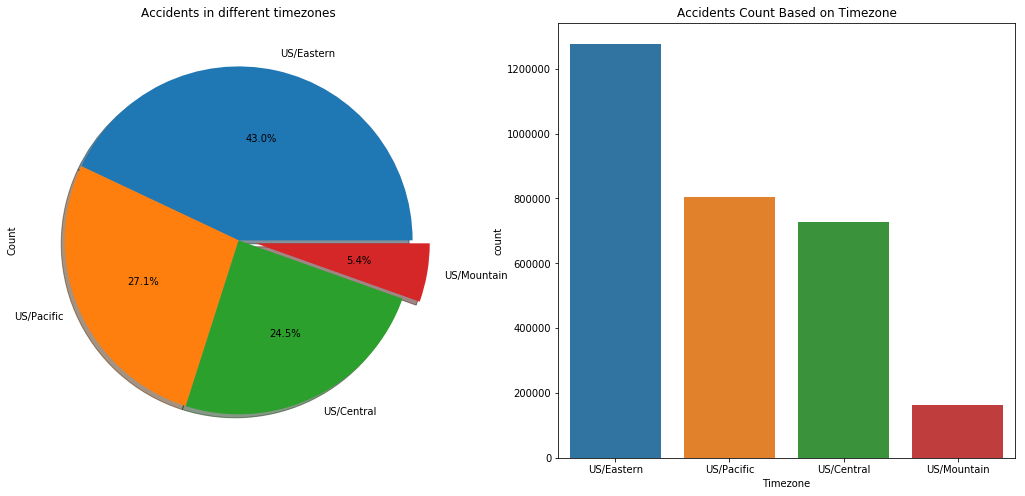

In [60]:
fig ,ax = plt.subplots(1,2,figsize=(18,8))
df['Timezone'].value_counts().plot.pie(explode=[0,0,0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Accidents in different timezones')
ax[0].set_ylabel('Count')
sns.countplot('Timezone',data=df,ax=ax[1],order=df['Timezone'].value_counts().index)
ax[1].set_title('Accidents Count Based on Timezone')
plt.show()

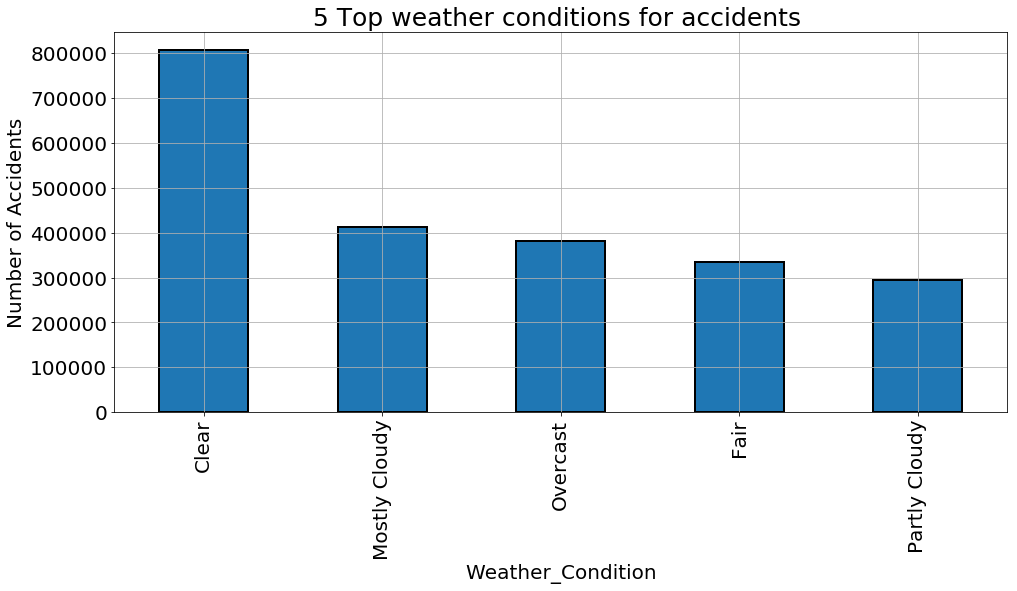

In [62]:
fig ,ax =plt.subplots(figsize=(16,7))
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(5).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Weather_Condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top weather conditions for accidents ',fontsize=25)
plt.grid()
plt.ioff()

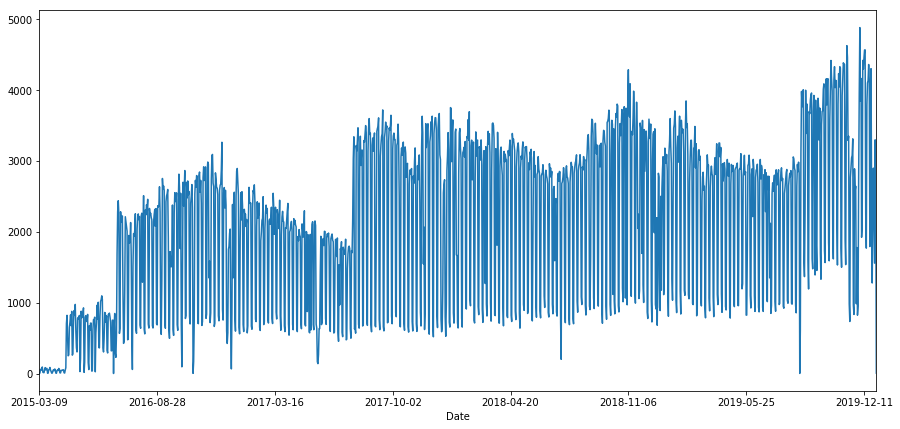

In [63]:
fig, ax = plt.subplots(figsize=(15,7))
df_cond.groupby(['Date']).count()['SumCollisionCount'].plot(ax=ax)

In [71]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension


    100% |████████████████████████████████| 266kB 5.6MB/s ta 0:00:01
    100% |████████████████████████████████| 3.1MB 5.5MB/s eta 0:00:01
    100% |████████████████████████████████| 61kB 10.2MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 9.5MB/s eta 0:00:01
    100% |████████████████████████████████| 6.5MB 2.3MB/s eta 0:00:01    58% |██████████████████▊             | 3.8MB 12.2MB/s eta 0:00:01
    100% |████████████████████████████████| 307kB 12.1MB/s ta 0:00:01
    100% |████████████████████████████████| 604kB 9.6MB/s eta 0:00:01
    100% |████████████████████████████████| 12.5MB 2.3MB/s eta 0:00:01
    100% |████████████████████████████████| 133kB 12.1MB/s ta 0:00:01
    100% |████████████████████████████████| 61kB 15.0MB/s ta 0:00:01
    100% |████████████████████████████████| 122kB 14.4MB/s ta 0:00:01
    100% |████████████████████████████████| 10.0MB 3.2MB/s eta 0:00:01
    100% |████████████████████████████████| 28.4MB 768kB/s eta 0:00:01   25% |████████▎      

    100% |████████████████████████████████| 1.6MB 9.0MB/s eta 0:00:01
    100% |████████████████████████████████| 296kB 13.2MB/s ta 0:00:01
    100% |████████████████████████████████| 2.2MB 6.6MB/s eta 0:00:01


  Stored in directory: /Users/emrentero/Library/Caches/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Stored in directory: /Users/emrentero/Library/Caches/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: /Users/emrentero/Library/Caches/pip/wheels/07/1c/dc/6831446f09feb8cc199ec73a0f2f0703253f6ae013a22f4be9
Successfully built confuse htmlmin imagehash
  Found existing installation: requests 2.21.0
    Uninstalling requests-2.21.0:
      Successfully uninstalled requests-2.21.0
  Found existing installation: tqdm 4.31.1
    Uninstalling tqdm-4.31.1:
      Successfully uninstalled tqdm-4.31.1
  Found existing installation: astropy 3.1.2
    Uninstalling astropy-3.1.2:
      Successfully uninstalled astropy-3.1.2
  Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2
  Found existing installation: matplotlib 3.0.3
    Uninstalling matplotlib-3.0.3:
      

In [73]:
#df.profile_report()